<a href="https://colab.research.google.com/github/maheravi/Deep-Learning/blob/main/Recurrent%20Neural%20Network/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
N = 1500
t = np.arange(0,N)

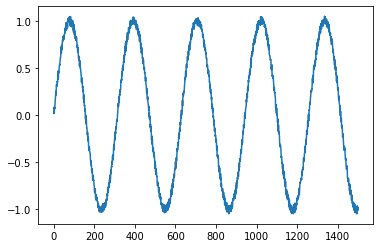

In [3]:
data_sin = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
plt.plot(data_sin)

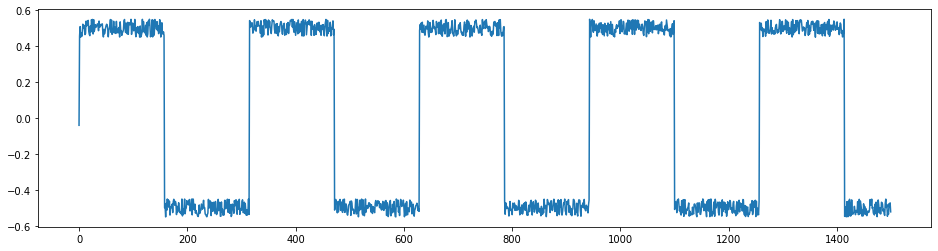

In [4]:
data_square = np.sign(np.sin(0.02 * t))/2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_square)
plt.show()

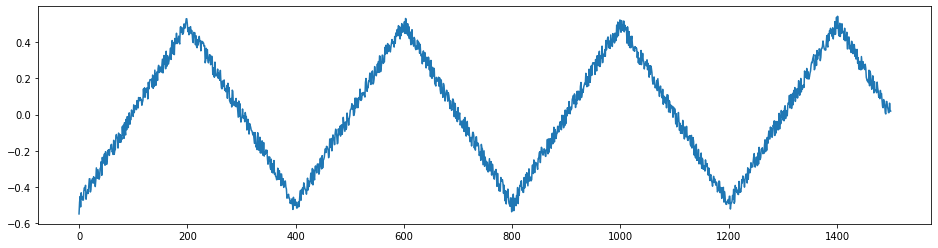

In [5]:
P = 200
A = 2
data_triangle = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(16, 4))
plt.plot(data_triangle)
plt.show()

In [32]:
def ConvertSignalToDataset(signal, step, label):
  X = []
  y = []
  for i in range(len(signal)-step):
    j = i + step
    X.append(signal[i:j])
    y.append(label)

  return np.array(X), np.array(y)

In [7]:
X_sin, y_sin = ConvertSignalToDataset(data_sin, 40, 0)
X_square, y_square = ConvertSignalToDataset(data_square, 40, 1)
X_triangle, y_triangle = ConvertSignalToDataset(data_triangle, 40, 2)


In [8]:
X_sin.shape

(1460, 40)

In [9]:
X = np.concatenate((X_sin, X_square, X_triangle))
y = np.concatenate((y_sin, y_square, y_triangle))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [20]:
model = tf.keras.models.Sequential([
        layers.SimpleRNN(units=64, input_shape=(None, 1)),
        layers.Dense(3, activation='softmax')
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
219/219 [==============================] - 6s 24ms/step - loss: 0.8624 - accuracy: 0.6147
Epoch 2/20
219/219 [==============================] - 6s 25ms/step - loss: 0.6529 - accuracy: 0.7466
Epoch 3/20
219/219 [==============================] - 5s 25ms/step - loss: 0.6262 - accuracy: 0.7691
Epoch 4/20
219/219 [==============================] - 5s 24ms/step - loss: 0.7168 - accuracy: 0.6932
Epoch 5/20
219/219 [==============================] - 5s 25ms/step - loss: 0.6550 - accuracy: 0.7392
Epoch 6/20
219/219 [==============================] - 5s 25ms/step - loss: 0.6136 - accuracy: 0.7620
Epoch 7/20
219/219 [==============================] - 5s 25ms/step - loss: 0.4874 - accuracy: 0.8076
Epoch 8/20
219/219 [==============================] - 5s 25ms/step - loss: 0.5117 - accuracy: 0.7971
Epoch 9/20
219/219 [==============================] - 5s 24ms/step - loss: 0.4292 - accuracy: 0.8564
Epoch 10/20
219/219 [==============================] - 5s 25ms/step - loss: 0.4599 - accura

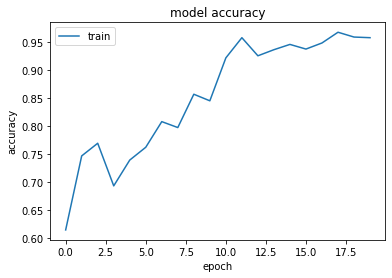

In [23]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [24]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 7ms/step - loss: 0.2705 - accuracy: 0.9087


[0.27052587270736694, 0.9086757898330688]

## Inference

In [27]:
N = 40
t = np.arange(0,N)

x = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(np.argmax(result))

0


In [29]:
N = 40
t = np.arange(0,N)

x = np.sign(np.sin(0.02 * t))/2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(np.argmax(result))

2


In [31]:
N = 40
t = np.arange(0,N)

x = ((A/P) * (P - np.abs(t % (2*P) - P)) - 1) / 2 + np.random.uniform(-0.05, 0.05, N)
x = x.reshape(1, -1, 1)

result = model.predict(x)
print(np.argmax(result))


2
